Meta Analysis of the Training, Testing, Validation Datasets for Project Bike Vision

In [182]:
import os
import re
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [187]:
path = ''
annot_path = '' 

In [115]:
dic = {}
for p in os.listdir(path):
    q = re.match(r'([0-9a-fA-F-]+)-\d+\.(jpg|jpeg)',p)
    if q:
        if q.group(1) not in dic.keys():
            dic[q.group(1)] = 1
        else:
            dic[q.group(1)] += 1
    

In [153]:
##some work to rename some files so that they'll be captured by the regex. 
###this contains some circular references calling on later defined objects, do not run.
#for m in fff[fff['fname'] == 'none']['filename']:
#    source_path = os.path.join(path,m)
#    m_mute = m[:-5] + '-0.jpeg'
#    destination_path = os.path.join(path,m_mute)
#    os.rename(source_path, destination_path)

In [137]:
##remapping file system tasks, ignore.
#dict_remap_original_csv = {}
#for b in fff[fff['fname'] == 'none']['filename']:
#    dict_remap_original_csv[b] = b[:-5] + '-0.jpeg'
    
#df['filename'] = df['filename'].replace(dict_remap_original_csv)
#df.to_csv(annot_path)

In [160]:
df = pd.read_csv(annot_path)

In [150]:
fff = pd.DataFrame(df.groupby('filename')['region_count'].max()).reset_index()
fff['fname'] = fff['filename'].apply(lambda x: re.match(r'([0-9a-fA-F-]+)-\d+\.(jpg|jpeg)',x).group(1) if re.match(r'([0-9a-fA-F-]+)-\d+\.(jpg|jpeg)',x) else 'none')
fff['ct_nz'] = fff['region_count'].apply(lambda x: 1 if x> 0 else 0)
fff['ct_all'] = 1
ffg = pd.DataFrame(fff.groupby('fname')[['region_count','ct_nz','ct_all']].sum().reset_index())
ffg['examples_per_photo'] = ffg['region_count']/ffg['ct_all']
ffg['percent_examples'] = ffg['ct_nz']/ffg['ct_all']
ffh = ffg.sort_values(by = 'examples_per_photo', ascending = False)

In [151]:
#checking for losses:
assert fff[fff['fname'] == 'none']['filename'].empty

Text(0, 0.5, '% of Examples w/ Target in Training Set')

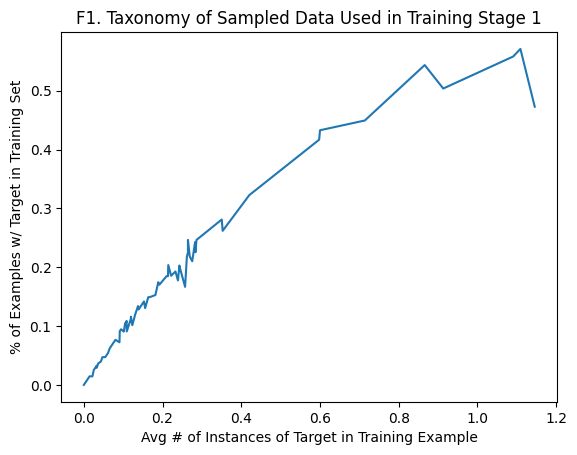

In [159]:
plt.plot(ffh['examples_per_photo'],ffh['percent_examples'])
plt.title('F1. Taxonomy of Sampled Data Used in Training Stage 1')
plt.xlabel('Avg # of Instances of Target in Training Example')
plt.ylabel('% of Examples w/ Target in Training Set')

Text(0.5, 1.0, 'F2a. Histogram of Frequency of Incidence of Target in Training Imagery')

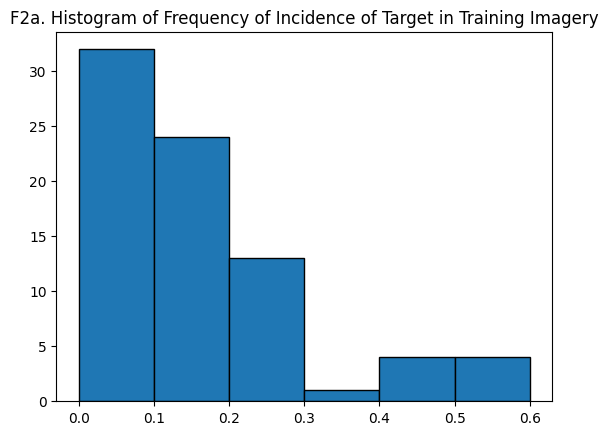

In [178]:
#histogram of the data
fh_cuts1 = [0,0.1,0.2,0.3,0.4,0.5,0.6]
#fh_cuts1_lab = [f'{lower}-{upper}'for lower, upper in zip(fh_cuts1,fh_cuts1[1:])]
fh_cuts2 = [0,0.2,0.4,0.6,0.8,1.0,1.2]
#fh_cuts2_lab = [f'{lower}-{upper}'for lower, upper in zip(fh_cuts2,fh_cuts2[1:])]
#ffh['bucket_perc'] = pd.cut(ffh['percent_examples'], bins=fh_cuts1, labels=fh_cuts1_lab, include_lowest=True, right=False)
#ffh['bucket_inst'] = pd.cut(ffh['examples_per_photo'], bins=fh_cuts2, labels=fh_cuts2_lab, include_lowest=True, right=False)

plt.hist(ffh['percent_examples'],bins=fh_cuts1, edgecolor='black')
plt.title('F2a. Histogram of Frequency of Incidence of Target in Training Imagery')

Text(0.5, 1.0, 'F2a. Histogram of Average Rate of Incidence of Target in Training Imagery')

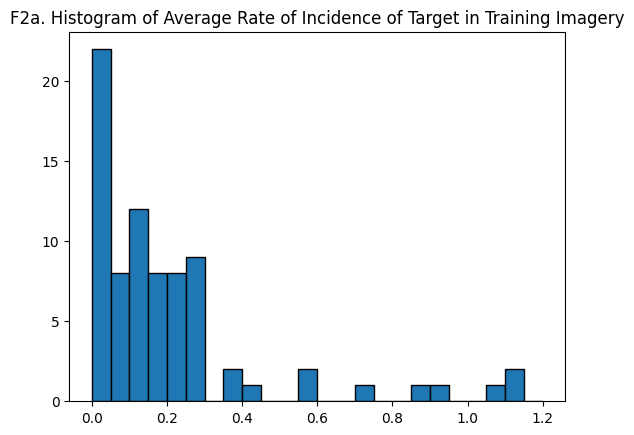

In [185]:
plt.hist(ffh['examples_per_photo'],bins=np.arange(0, 1.25, 0.05).tolist(), edgecolor='black')
plt.title('F2b. Histogram of Average Rate of Incidence of Target in Training Imagery')

Data structured in this manner makes an excellent case for transfer learning, as 

In [170]:
ffh.head(30)

,fname,region_count,ct_nz,ct_all,examples_per_photo,percent_examples,bucket_perc,bucket_inst
68,c61490de-9ab7-4321-919c-cf8ad9ca5100,315,130,275,1.145455,0.472727,0.4-0.5,1.0-1.2
61,ac9ea7e9-4ab8-4188-be33-40266bcf9378,305,157,275,1.109091,0.570909,0.5-0.6,1.0-1.2
27,5674d0ea-703a-43c3-bea7-2b372d1eb00b,301,154,276,1.090580,0.557971,0.5-0.6,1.0-1.2
32,6316453d-6161-4b98-a8e7-0e36c69d267c,252,139,276,0.913043,0.503623,0.5-0.6,0.8-1.0
39,786650de-d254-47dc-aa8a-de9a4c231a2a,239,150,276,0.865942,0.543478,0.5-0.6,0.8-1.0
71,db5f8b82-99b1-45f3-a520-7d1f91d0a49a,197,124,276,0.713768,0.449275,0.4-0.5,0.6-0.8
51,98c2de4e-fa0c-41d0-b1ea-6d1df833d792,165,119,275,0.600000,0.432727,0.4-0.5,0.6-0.8
29,5c505897-b475-4359-897d-b064bdb9feef,165,115,276,0.597826,0.416667,0.4-0.5,0.4-0.6
2,19789499-03ac-45de-9401-a7a71ea60d1e,116,89,276,0.420290,0.322464,0.3-0.4,0.4-0.6
5,23994d9e-7e59-4808-8d47-405f779d19cf,97,72,275,0.352727,0.261818,0.2-0.3,0.2-0.4
